# Keras/Tensorflow Project
**-by Om Kapoor**

In this project, our goal is to build a model that can predict wether or nor a borrower will pay back their loan based on the LendingClub dataset (from kaggle: https://www.kaggle.com/wordsforthewise/lending-club). This can help the bank assess a new potential customer on whether or not they are likely to pay back their loan if taken from the bank. 

We will be going through the dataset, making required amends to the missing or dissimilar data, do some exploratory data analysis, data pre-processing, creating a model, and finally evaluating the model's performance.

## Loading the data and library imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

As there are a lot of columns with abbreviations as well, we will create a function to see the description of a column whenever needed

In [5]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [6]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [7]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [8]:
feat_info('mort_acc')

Number of mortgage accounts.


## Exploratory Data Analysis

In [9]:
df.shape

(396030, 27)

As can be seen from the dataset, we can infer that our target column is "loan_status".

Thus, first we will see the count of "loan status", of how many people paid back their loan and how many didnt using a counplot.

C:\Users\omkap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

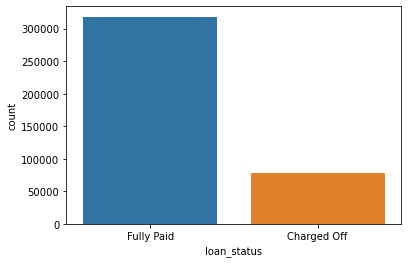

In [10]:
sns.countplot(df['loan_status'])

Next we will visualize the distribution of the loan amount by creating a histogram of the loan_amnt column.

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

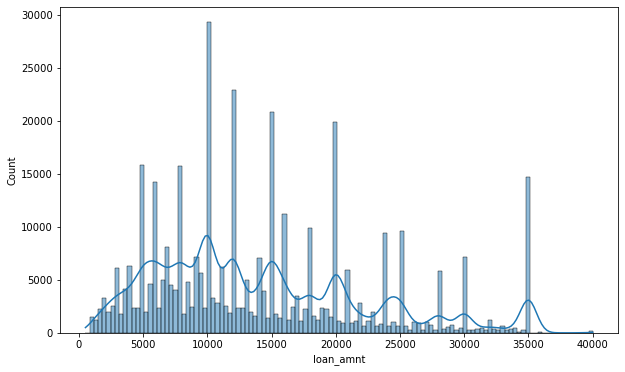

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df['loan_amnt'],bins='auto',kde=True)

Nextup we'll explore the correlation between the continuous feature variables using .corr()

In [12]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


We'll visualize the correlation using a heatmap

<AxesSubplot:>

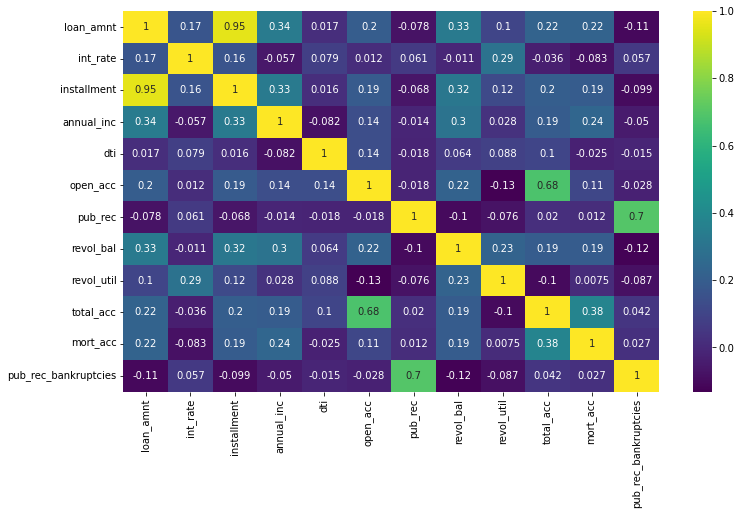

In [13]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

We notice almost perfect correlation with the "installment" feature.   
So lets dig into this feature further

In [14]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

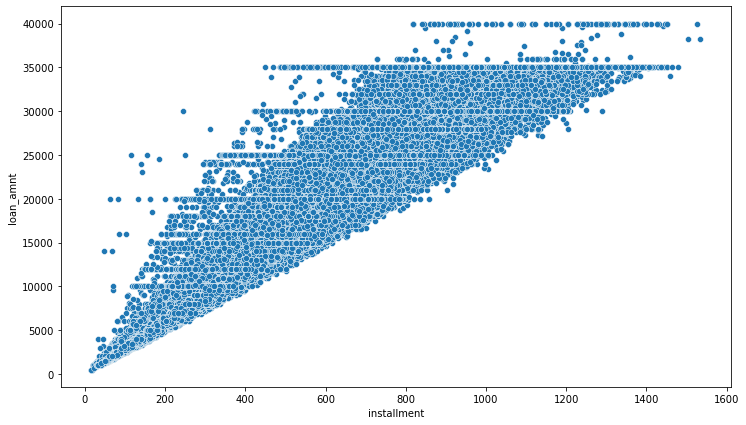

In [15]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=df['installment'],y=df['loan_amnt'])

Next we want to see the relationship between the loan_status and the Loan Amount.

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

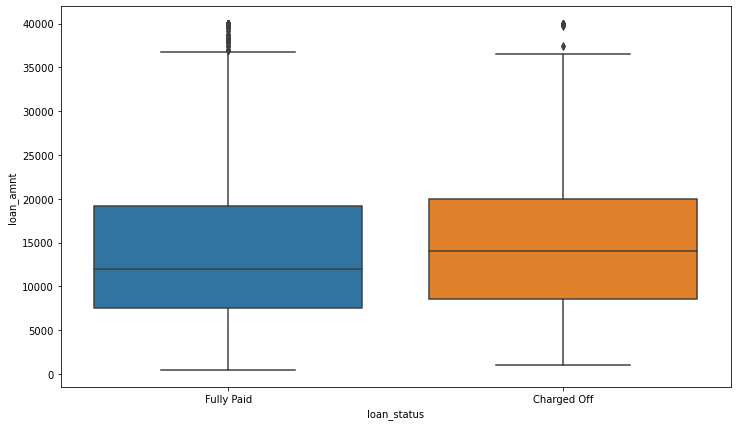

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(x=df['loan_status'],y=df['loan_amnt'])

In [17]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Now we shall see the Grade and SubGrade columns

In [18]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [19]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

Now lets see what's the size of these grades and subgrades

C:\Users\omkap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

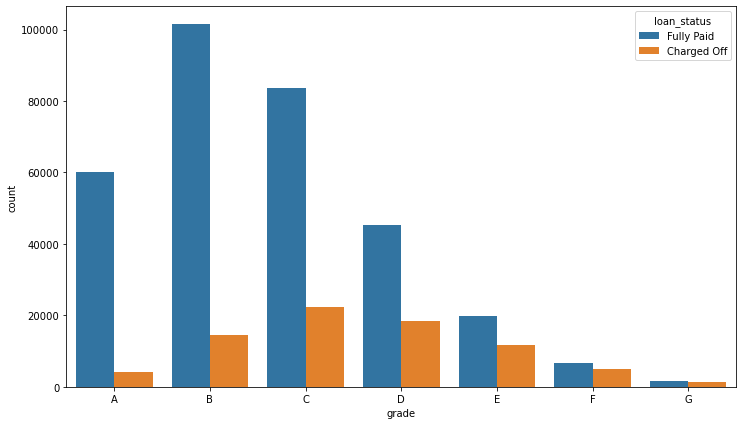

In [20]:
plt.figure(figsize=(12,7))
sns.countplot(df['grade'],order=sorted(df['grade'].unique()),hue=df['loan_status'])

C:\Users\omkap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

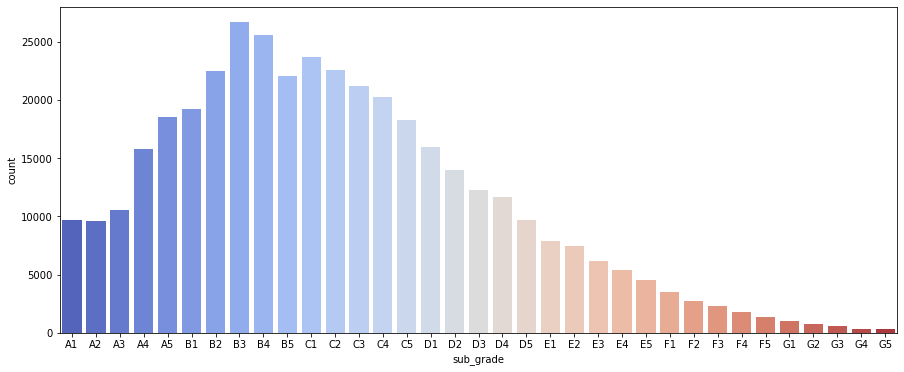

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(df['sub_grade'],order=sorted(df['sub_grade'].unique()),palette='coolwarm')

C:\Users\omkap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

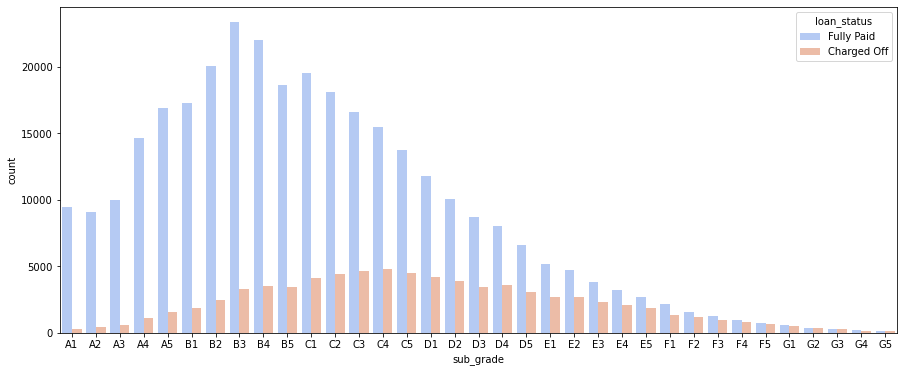

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(df['sub_grade'],order=sorted(df['sub_grade'].unique()),palette='coolwarm',hue=df['loan_status'])

It looks like the percent of people not paying back is the highest in E, F, and G subgrades don't get paid back that often. We will analyse these sybgrades a bit more.

In [23]:
df[(df['grade'].values == 'E') | (df['grade'].values == 'F') | (df['grade'].values == 'G')]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
16,32350.0,60 months,21.98,893.11,E,E4,Comcast Corporate office,10+ years,MORTGAGE,72000.00,...,16.0,0.0,23603.0,78.4,22.0,f,INDIVIDUAL,1.0,0.0,"407 Briggs Lodge Suite 778\nWest Aprilborough,..."
41,28000.0,60 months,19.91,312.04,E,E4,American Airlines,10+ years,RENT,52000.00,...,10.0,0.0,29178.0,87.6,16.0,f,INDIVIDUAL,NaN,0.0,"5836 Garcia Falls Apt. 525\nMatthewtown, CT 22690"
48,16000.0,60 months,18.54,411.01,E,E1,Accountant,3 years,RENT,40000.00,...,16.0,0.0,13179.0,55.6,20.0,w,INDIVIDUAL,0.0,0.0,"76010 Houston Haven\nPort Keithburgh, MI 86630"
59,15000.0,60 months,18.55,385.41,E,E2,Field Biologist,3 years,RENT,50000.00,...,6.0,0.0,8912.0,47.9,23.0,f,INDIVIDUAL,3.0,0.0,"230 Denise Vista\nCarterville, NY 30723"
61,25000.0,60 months,22.15,692.61,E,E5,Rural Letter Carrier,10+ years,MORTGAGE,80000.00,...,13.0,0.0,20395.0,74.4,41.0,f,INDIVIDUAL,4.0,0.0,"0676 Kaiser Bypass\nSinghburgh, SD 22690"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395973,16075.0,60 months,21.48,439.24,E,E5,Admin Assistant,2 years,MORTGAGE,36111.00,...,15.0,0.0,27117.0,82.4,26.0,w,INDIVIDUAL,3.0,0.0,Unit 5107 Box 8137\nDPO AP 22690
395976,16475.0,60 months,25.83,491.62,G,G2,assembly technician,7 years,OWN,55000.00,...,17.0,0.0,15548.0,41.2,55.0,f,INDIVIDUAL,0.0,0.0,"0288 Joseph Lakes Suite 493\nLarsonfurt, ID 70466"
395978,20950.0,60 months,21.48,572.44,E,E2,bus operator,6 years,RENT,60000.00,...,18.0,0.0,17302.0,36.7,32.0,f,INDIVIDUAL,1.0,0.0,"53654 Taylor Extensions\nWilsonchester, MO 22690"
395985,10150.0,60 months,20.99,274.54,E,E4,Electrician,< 1 year,RENT,30000.00,...,11.0,0.0,9056.0,45.3,22.0,w,INDIVIDUAL,0.0,0.0,"103 Jeremy Trafficway\nEast Eric, AR 30723"


C:\Users\omkap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

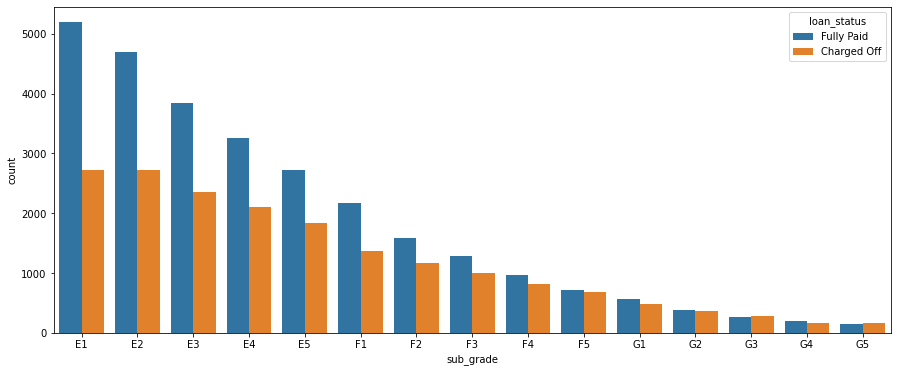

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(df[(df['grade'].values == 'E') | (df['grade'].values == 'F') | (df['grade'].values == 'G')]['sub_grade'],hue=df['loan_status'],
             order=sorted(df[(df['grade'].values == 'E') | (df['grade'].values == 'F') | (df['grade'].values == 'G')]['sub_grade'].unique()))

We can see the least percent of people paying back is of F and G subgrade.

Next we create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [25]:
def loan_repay(loan_status):
    if loan_status == 'Fully Paid':
        return 1
    else:
        return 0

In [26]:
df['loan_repaid'] = df['loan_status'].apply(loan_repay)

In [27]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


Next up we want to see the correlation of the numeric features to the new loan_repaid column.

<AxesSubplot:>

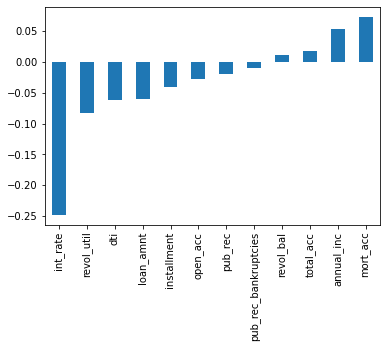

In [28]:
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')

We can see here which features affect the loan_repaid column in both negative and positive ways

## Data PreProcessing

First we check our dataset of any missing values in any columns. We will do this with a heatmap

<AxesSubplot:>

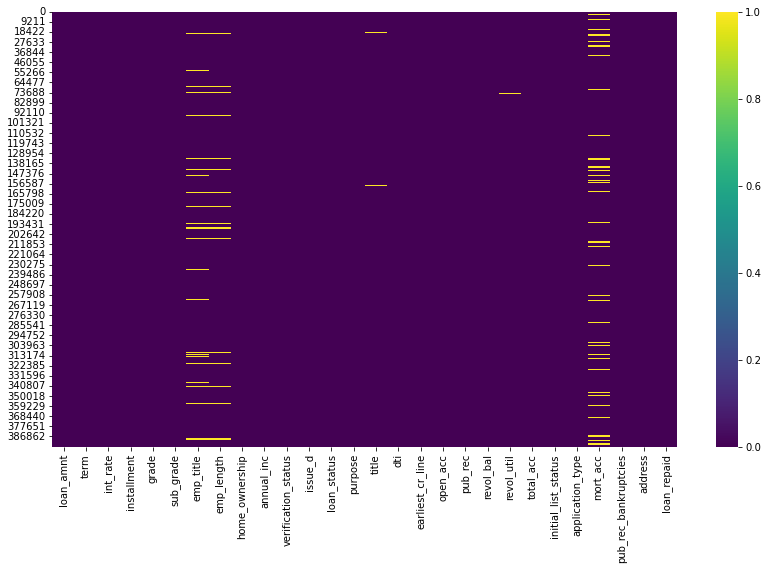

In [29]:
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull(),cmap='viridis')

In [30]:
len(df)

396030

In [31]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Missing data percentage per column

In [32]:
missing_data = (df.isnull().sum().sum())/len(df)*100
missing_data

20.601722091760724

In [33]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

Now starting with 'emp_title' and 'emp_length' to see whether we can fill in the data, or need to drop it

In [34]:
df[['emp_title','emp_length']]

,emp_title,emp_length
0,Marketing,10+ years
1,Credit analyst,4 years
2,Statistician,< 1 year
3,Client Advocate,6 years
4,Destiny Management Inc.,9 years
...,...,...
396025,licensed bankere,2 years
396026,Agent,5 years
396027,City Carrier,10+ years
396028,"Gracon Services, Inc",10+ years


In [35]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [36]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [37]:
df['emp_title'].nunique()

173105

In [38]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

As there are a lot of unique titles, we would need an in depth evaluation and consider many assumptions of each title to be able to fill in any empty values. Thus it is better to drop it for this project

In [39]:
df=df.drop('emp_title',axis=1)

Now seeing the emp_length column

In [40]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [41]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [42]:
emp_le_order = [ '< 1 year',
                '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
'10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

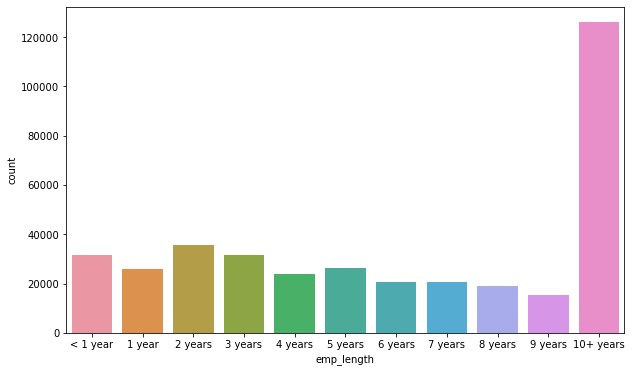

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['emp_length'],order=emp_le_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

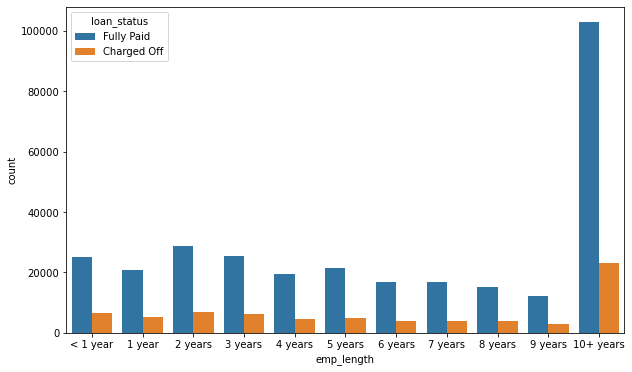

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['emp_length'],order=emp_le_order,hue=df['loan_status'])

This doesn't inform us of any strong relationship between employment length and loan being repaid, as the trend seems to be similar in all the emp_length categories. We can check percentage wise as well.

In [45]:
repaid = df.groupby('emp_length')['loan_repaid'].sum()

In [46]:
total = df.groupby('emp_length').count()['loan_repaid']

In [47]:
not_repaid = 100*(total-repaid)/total

<AxesSubplot:xlabel='emp_length'>

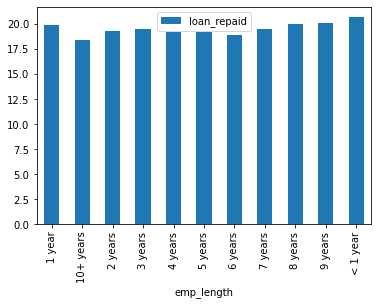

In [48]:
pd.DataFrame(not_repaid).plot(kind='bar')

Well the charge off rates are very similar across all employment lengths. Thus we cannot make any assumptions right now tofill in the empty data, hence we will drop the emp_length column as it doesnt affect the target label much.

In [49]:
df = df.drop('emp_length',axis=1)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  title                 394275 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

<AxesSubplot:>

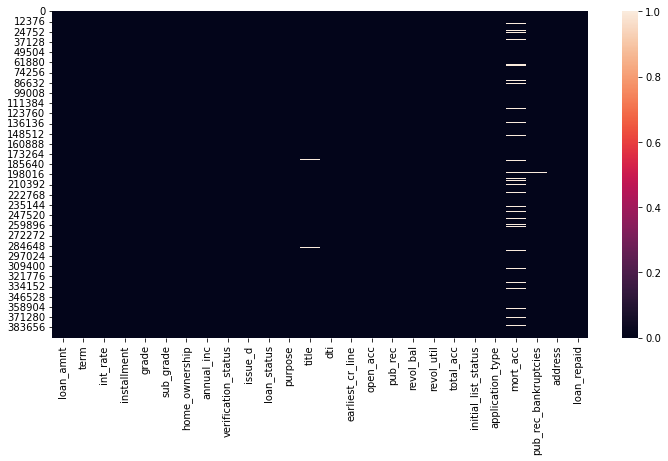

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

In [52]:
df[['title','purpose']].head(10)

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
5,Debt consolidation,debt_consolidation
6,Home improvement,home_improvement
7,No More Credit Cards,credit_card
8,Debt consolidation,debt_consolidation
9,Debt Consolidation,debt_consolidation


In [53]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

The title column is simply a string subcategory/description of the purpose column. So we can Go drop the title column.

In [54]:
df = df.drop('title',axis=1)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  object 
 14  open_acc              396030 non-null  float64
 15  

Moving on to the mort_acc feature.

In [56]:
feat_info('mort_acc')

Number of mortgage accounts.


In [57]:
sorted(df['mort_acc'].unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 nan,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 30.0,
 31.0,
 32.0,
 34.0]

In [58]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

We can look for a way to fill in the missing data here as it is numerical, hence we see any correlation with other columns

In [59]:
df.corr()['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [60]:
avg_total_acc = df.groupby('total_acc').mean()['mort_acc']

In [61]:
avg_total_acc

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the series we created above.

In [62]:
def fill_miss_data(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return avg_total_acc[total_acc]
    else:
        return mort_acc

In [63]:
df['mort_acc'] = df.apply(lambda x: fill_miss_data(x['total_acc'],x['mort_acc']),axis=1)

In [64]:
df['mort_acc']

0         0.000000
1         3.000000
2         0.000000
3         0.000000
4         1.000000
            ...   
396025    0.000000
396026    1.000000
396027    0.000000
396028    5.000000
396029    1.358013
Name: mort_acc, Length: 396030, dtype: float64

In [65]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

Finally, only 'revol_util' and the 'pub_rec_bankruptcies' column have missing data points, but they account for less than 0.5% of the total data in their columns. Thus we can remove the rows that are missing those values in those columns.

In [66]:
df = df.dropna()

In [67]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

Now we need to deal with the string values in the categorical columns.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

In [69]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

We'll go through all the string features to see what we should do with them.

'term' feature:

In [126]:
df['term']

0         36
1         36
2         36
3         36
4         36
          ..
396025    36
396026    36
396027    36
396028    36
396029    36
Name: term, Length: 395219, dtype: int64

We will retain just the numerical feature of the 'term' column

In [71]:
def int_term(term):
    for i in range(len(df)):
        return int(df['term'][i].split()[0])

In [72]:
df['term'] = df['term'].apply(int_term)

In [73]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,36,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


'grade' feature

As we have seen it earlier so we already know grade is part of sub_grade, so just drop the grade feature as subgrade gives us a more detailed information than just the grade.

In [74]:
df=df.drop('grade',axis=1)

Next, we will convert the subgrade feature into dummy variables, as we cannot use them as is in our model.  
Then we will drop the sub_grade feature as it will no longer be of any use to us

In [76]:
df2 = pd.get_dummies(df['sub_grade'],drop_first=True)

In [77]:
df2

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df = df.drop('sub_grade',axis=1)

In [79]:
df = pd.concat([df,df2],axis=1)

We will do the same to convert these columns such as 'verification_status', 'application_type','initial_list_status', and 'purpose' into dummy variables and concatenate them with the original dataframe.

In [80]:
ver_dummy = pd.get_dummies(df['verification_status'],drop_first=True)
app_dummy = pd.get_dummies(df['application_type'],drop_first=True)
ini_dummy = pd.get_dummies(df['initial_list_status'],drop_first=True)
pur_dummy = pd.get_dummies(df['purpose'],drop_first=True)

In [81]:
df = df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1)

In [82]:
df = pd.concat([df,ver_dummy,app_dummy,ini_dummy,pur_dummy],axis=1)

In [83]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified',
       'Verified', 'INDIVIDUAL', 'JOINT', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

'home_ownership' feature

In [84]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

We need to convert these to dummy variables, and club 'NONE' and 'ANY' with 'OTHER', so that we end up with just 4 categories.

In [85]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [86]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [87]:
hom_dummy = pd.get_dummies(df['home_ownership'],drop_first=True)

In [88]:
df = df.drop('home_ownership',axis=1)

In [89]:
df = pd.concat([df,hom_dummy],axis=1)

'address' feature

We will feature engineer the zip code column from the address in the data set. for this we will create a column called 'zip_code' that extracts the zip code from the address column.

In [90]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

Now we will make this zip_code column into dummy variables.

In [91]:
zip_dummy = pd.get_dummies(df['zip_code'],drop_first=True)

In [92]:
df = pd.concat([df,zip_dummy],axis=1)

In [93]:
df = df.drop(['address','zip_code'],axis=1)

'issue_d feature

We wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date. Hence I will drop this feature as this would be data leakage

In [94]:
df = df.drop('issue_d',axis=1)

'earliest_cr_line' 

We will extract the year from this feature and then convert it to a numeric feature.

In [95]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [96]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda earliest_cr_line: int(earliest_cr_line[-4:]))

In [97]:
df = df.drop('earliest_cr_line',axis=1)

## Train Test Split and Normalizing the Data


Now we will split our data into train and test parts

In [99]:
from sklearn.model_selection import train_test_split

In [103]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
df = df.drop('loan_status',axis=1)

In [101]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [102]:
print(len(df))

395219


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [105]:
scaler = MinMaxScaler()

In [106]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

Now we will create a basic Deep Learning model

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

We will build a sequential model that goes 78 --> 39 --> 19--> 1 output neuron. We will also add the dropout layers, and choose the optimizer as 'adam'.

In [108]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(9,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

We will fit the model to the training data for 25 epochs, add in the validation data for later plotting, and add in a batch_size of 256.

In [109]:
model.fit(x=X_train,y=y_train,batch_size=256,epochs=25,validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.3158 - val_loss: 0.2658
Epoch 2/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2706 - val_loss: 0.2643
Epoch 3/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2685 - val_loss: 0.2647
Epoch 4/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2669 - val_loss: 0.2625
Epoch 5/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2665 - val_loss: 0.2622
Epoch 6/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2660 - val_loss: 0.2624
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2653 - val_loss: 0.2635
Epoch 8/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2652 - val_loss: 0.2616
Epoch 9/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2646 - val_loss: 0.2618
Epoch 10/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.264

We will then save the model

In [110]:
from tensorflow.keras.models import load_model

In [111]:
model.save('Deep_Learning_project_model.h5')  

# Evaluating Model Performance.

we will plot out the validation loss versus the training loss.

In [112]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

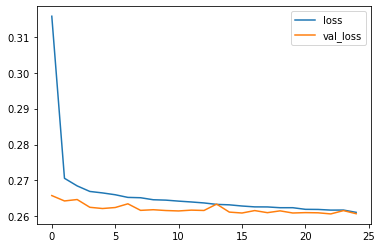

In [113]:
losses.plot()

Next we will create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.

In [114]:
from sklearn.metrics import classification_report,confusion_matrix

In [115]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

2471/2471 [==============================] - 2s 782us/step


In [116]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [117]:
print(confusion_matrix(y_test,predictions))

[[ 7048  8610]
 [  252 63134]]


Now foinally to test our model, we will take a random customer and then see if the bank would offer this person a loan or not.

In [118]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   36.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [119]:
new_customer = new_customer.values.reshape(1,78)

In [120]:
new_customer = scaler.transform(new_customer)

In [121]:
new_cust_pred = model.predict(new_customer)
new_cust_pred = (new_cust_pred>0.5).astype(int)

1/1 [==============================] - 0s 16ms/step


In [122]:
new_cust_pred

array([[1]])

This shows that the person will repay his loan (if granted by the bank ofc!) 

And we will also check id this person actually end up paying back their loan or not!

In [123]:
random_ind

304691

In [124]:
df['loan_repaid'].iloc[random_ind]

1

Well he did!   

Good guy!

Hence, we can say we bulit a pretty robust model to help any banker or investor to decide based on a customer's details whether they will pay back their loan or not, and then make an informed decsion!